In [1]:
from google.colab import files
uploaded = files.upload()

Saving Customer-Churn-Records (1).csv to Customer-Churn-Records (1).csv


## Análisis Exploratorio de Datos

**Pregunta Teórica**

¿Qué pasos seguirías para realizar un análisis exploratorio de los datos antes de construir un modelo de Machine Learning?

**Respuesta:**

- Importar las bibliotecas necesarias: Estas bibliotecas proporcionan las herramientas necesarias para la manipulación, análisis y visualización de datos.
-	Cargar los datos: Se cargan los datos en un DataFrame de pandas para su posterior análisis.
-	Examinar la estructura de los datos: Se obtiene una vista general de los datos, incluyendo los nombres de las columnas, los tipos de datos, las estadísticas descriptivas y la forma del conjunto de datos.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('Customer-Churn-Records (1).csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [5]:
df.shape

(10000, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


¿Cuál es el promedio de la puntuación de crédito (CreditScore) de los clientes?

In [8]:
balance_promedio_exited = df[df['Exited'] == 1]['Balance'].mean()
print(f"El balance promedio de los clientes que abandonaron el banco es: {balance_promedio_exited}")

El balance promedio de los clientes que abandonaron el banco es: 91109.47600588812


¿Cuál es el balance promedio (Balance) de los clientes que abandonaron el banco (Exited = 1)?

In [9]:
promedio_credit_score = df['CreditScore'].mean()
print(f"El promedio de la puntuación de crédito es: {promedio_credit_score}")

El promedio de la puntuación de crédito es: 650.5288


¿Cuál es la edad promedio (Age) de los clientes activos (IsActiveMember = 1)?

In [10]:
edad_promedio_activos = df[df['IsActiveMember'] == 1]['Age'].mean()
print(f"La edad promedio de los clientes activos es: {edad_promedio_activos}")

La edad promedio de los clientes activos es: 39.7914967967385


# Preprocesamiento de Datos

**Pregunta Teórica**

 Imagina que uno de los datos contiene valores faltantes o atípicos (outliers). ¿Qué técnicas utilizarías para tratar con estos problemas en el conjunto de datos de la tabla? Justifica tu respuesta.

 **Respuesta:**

 Cuando se detectan valores ausentes o atípicos, lo primero es determinar cuántos hay y en qué lugar se encuentran. Si los valores faltantes son pocos, es posible eliminar las filas o columnas correspondientes; pero si son numerosos, una opción es sustituirlos por el promedio. Los valores atípicos pueden localizarse utilizando el rango intercuartílico, y después se evalúa si conviene eliminarlos o agruparlos, dependiendo de si representan errores o simplemente datos extremos. Este proceso es fundamental para evitar que el modelo se entrene con información incorrecta o sesgada.


**Ejercicio Práctico**

- Convierte la variable Gender en una variable binaria (0: Female, 1: Male)
- Convierte la variable Geography en variables dummy (Francia = 1, España = 0, etc.).
- Rellena los valores faltantes, si los hubiera, con la media de la columna correspondiente.
- Escala las variables numericas (como CreditScore, Age, Balance, EstimatedSalary) utilizando Min-Max o StandardScaler.

In [11]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [12]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [13]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,1,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,1,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,0,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [14]:
country_mapping = {
    'France': 1,
    'Spain': 0,
    'Germany': 2,
}

df['Geography'] = df['Geography'].map(country_mapping)
country_mapping

{'France': 1, 'Spain': 0, 'Germany': 2}

In [15]:
scaler = MinMaxScaler()
cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

df[cols] = scaler.fit_transform(df[cols])

# Análisis de Correlación

¿Existen correlaciones fuertes entre algunas variables? ¿Cómo afectaría esto a un modelo predictivo?

- No, ninguna de las correlaciones es fuerte. Todas están extremadamente cerca de 0, lo que indica que no hay una relación lineal significativa entre estas variables.
- La ausencia de correlaciones fuertes entre las variables analizadas (CreditScore-Balance, Age-EstimatedSalary, Tenure-NumOfProducts) indica que no existe una relación lineal significativa entre ellas, lo cual puede tener dos efectos en un modelo predictivo: por un lado, es positivo porque evita problemas de multicolinealidad que afectan a modelos como la regresión logística; por otro lado, su baja correlación sugiere que estas variables, por sí solas, podrían tener poca capacidad predictiva lineal.

In [23]:
variables = ['CreditScore', 'Balance', 'Age', 'EstimatedSalary', 'Tenure', 'NumOfProducts']
correlacion = df[variables].corr()
print("Correlación entre CreditScore y Balance:", correlacion.loc['CreditScore', 'Balance'])
print("Correlación entre Age y EstimatedSalary:", correlacion.loc['Age', 'EstimatedSalary'])
print("Correlación entre Tenure y NumOfProducts:", correlacion.loc['Tenure', 'NumOfProducts'])

Correlación entre CreditScore y Balance: 0.0062683816160088975
Correlación entre Age y EstimatedSalary: -0.007201042376657382
Correlación entre Tenure y NumOfProducts: 0.013443755460747366


# Comparación de Modelos de Clasificación

**Pregunta Teórica**

En este caso, el objetivo es predecir si un cliente abandonaría el banco (Exited) basándonos en sus
 características. ¿Qué tipo de modelo de clasificación usarías y por qué? Discute las ventajas y desventajas
 de este modelo.

**Respuesta:**

Elegiría la Regresión Logística ya que es sencilla de entender e implementar, lo que facilita la interpretación. Como la variable objetivo (Exited) es binaria (0 o 1), la regresión lineal es adecuada para problemas de esta clasificación y, además de predecir si el cliente abandonará o no, proporciona la probabilidad de que un cliente pertenezca a cada clase, lo cual puede ser útil para tomar decisiones informadas sobre estrategias de retención de clientes.

Ventajas:
-	Es fácil de implementar y rápida de entrenar, incluso con grandes conjuntos de datos.
-	Se puede interpretar fácilmente el impacto de cada coeficiente.
-	Es menos propenso al sobreajuste en comparación con modelos más complejos.

Desventajas:
-	Si la relación es no lineal, la regresión logística puede no ser el modelo más preciso, ya que asume una relación lineal entre las variables predictoras y la variable objetivo.
-	Los valores atípicos pueden afectar la precisión del modelo, por lo que es importante tratarlos adecuadamente antes de entrenar el modelo.
-	Si la variable objetivo tiene más de dos clases, se deben utilizar otros modelos.


**Regresión Logística**

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

In [41]:
Distribución=df['Exited'].value_counts(normalize=True)
Distribución

,proportion
Exited,
0,0.7962
1,0.2038


In [35]:
x = df[['Age', 'IsActiveMember', 'Satisfaction Score', 'Complain', 'NumOfProducts']]
y = df['Exited']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=42)
print("Dimensiones del conjunto de entrenamiento:", X_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape)

Dimensiones del conjunto de entrenamiento: (7500, 5)
Dimensiones del conjunto de prueba: (2500, 5)


In [45]:
if y_train.value_counts(normalize=True).max() > 0.60:
    print("Aplicando SMOTE para balancear el conjunto de entrenamiento...")
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    print("Nueva distribución de clases:")
    print(pd.Series(y_train).value_counts(normalize=True))

In [47]:
# Árbol de Decisión
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Regresión Logística
lr_model = LogisticRegression(max_iter=10000, random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

Reporte de Clasificación - Árbol de Decisión (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1991
           1       1.00      1.00      1.00       509

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500

Reporte de Clasificación - Regresión Logística (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1991
           1       1.00      1.00      1.00       509

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



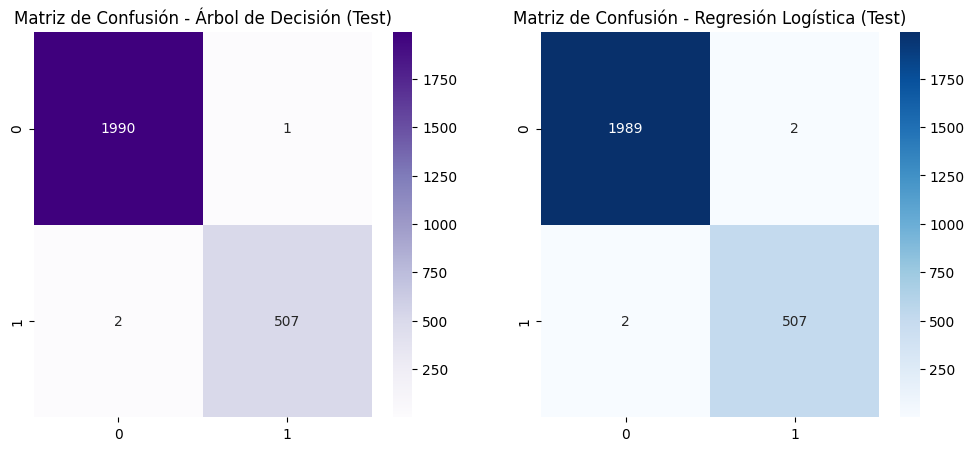

Reporte de Clasificación - Árbol de Decisión (Train):
Reporte de Clasificación - Árbol de Decisión (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1991
           1       1.00      1.00      1.00       509

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500

Reporte de Clasificación - Regresión Logística (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1991
           1       1.00      1.00      1.00       509

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



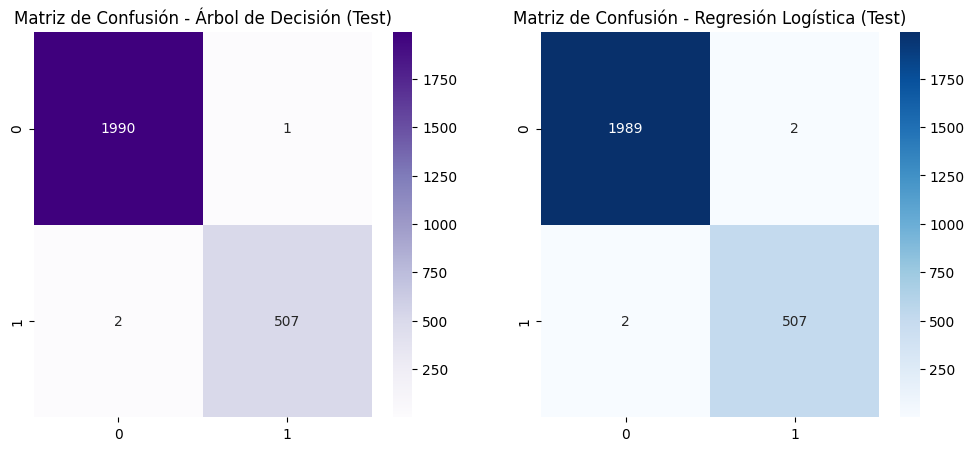

Reporte de Clasificación - Árbol de Decisión (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5971
           1       1.00      1.00      1.00      5971

    accuracy                           1.00     11942
   macro avg       1.00      1.00      1.00     11942
weighted avg       1.00      1.00      1.00     11942

Reporte de Clasificación - Regresión Logística (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5971
           1       1.00      1.00      1.00      5971

    accuracy                           1.00     11942
   macro avg       1.00      1.00      1.00     11942
weighted avg       1.00      1.00      1.00     11942



In [50]:
## Evaluación en el conjunto de prueba
# Predicciones en test
y_pred_dt = dt_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

print("Reporte de Clasificación - Árbol de Decisión (Test):")
print(classification_report(y_test, y_pred_dt))

print("Reporte de Clasificación - Regresión Logística (Test):")
print(classification_report(y_test, y_pred_lr))

# Matrices de Confusión
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', ax=ax[0], cmap='Purples')
ax[0].set_title("Matriz de Confusión - Árbol de Decisión (Test)")
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', ax=ax[1], cmap='Blues')
ax[1].set_title("Matriz de Confusión - Regresión Logística (Test)")
plt.show()

## Evaluación en el conjunto de entrenamiento para detectar overfitting
y_pred_train_dt = dt_model.predict(X_train)
y_pred_train_lr = lr_model.predict(X_train)

print("Reporte de Clasificación - Árbol de Decisión (Train):")
## Evaluación en el conjunto de prueba
# Predicciones en test
y_pred_dt = dt_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

print("Reporte de Clasificación - Árbol de Decisión (Test):")
print(classification_report(y_test, y_pred_dt))

print("Reporte de Clasificación - Regresión Logística (Test):")
print(classification_report(y_test, y_pred_lr))

# Matrices de Confusión
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', ax=ax[0], cmap='Purples')
ax[0].set_title("Matriz de Confusión - Árbol de Decisión (Test)")
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', ax=ax[1], cmap='Blues')
ax[1].set_title("Matriz de Confusión - Regresión Logística (Test)")
plt.show()

## Evaluación en el conjunto de entrenamiento para detectar overfitting
y_pred_train_dt = dt_model.predict(X_train)
y_pred_train_lr = lr_model.predict(X_train)

print("Reporte de Clasificación - Árbol de Decisión (Train):")
print(classification_report(y_train, y_pred_train_dt))

print("Reporte de Clasificación - Regresión Logística (Train):")
print(classification_report(y_train, y_pred_train_lr))

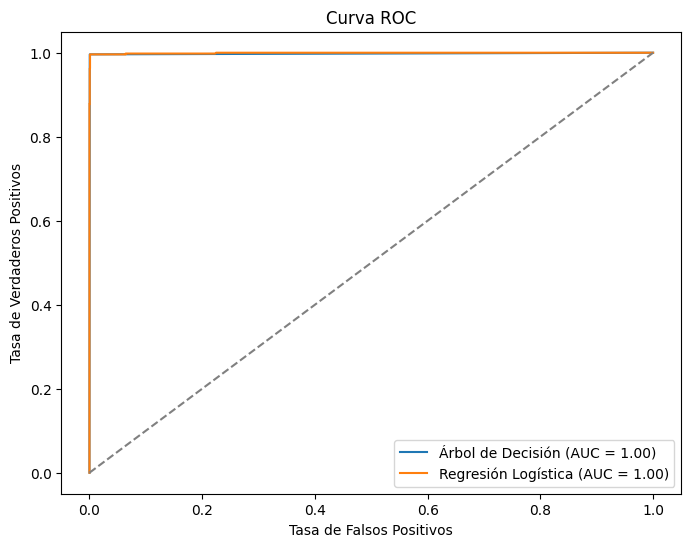

In [52]:
from sklearn.metrics import roc_curve, auc
# Obtener probabilidades en test
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

# Calcular ROC y AUC
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_dt = auc(fpr_dt, tpr_dt)
auc_lr = auc(fpr_lr, tpr_lr)

# Graficar ROC
plt.figure(figsize=(8,6))
plt.plot(fpr_dt, tpr_dt, label=f"Árbol de Decisión (AUC = {auc_dt:.2f})")
plt.plot(fpr_lr, tpr_lr, label=f"Regresión Logística (AUC = {auc_lr:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend()
plt.show()

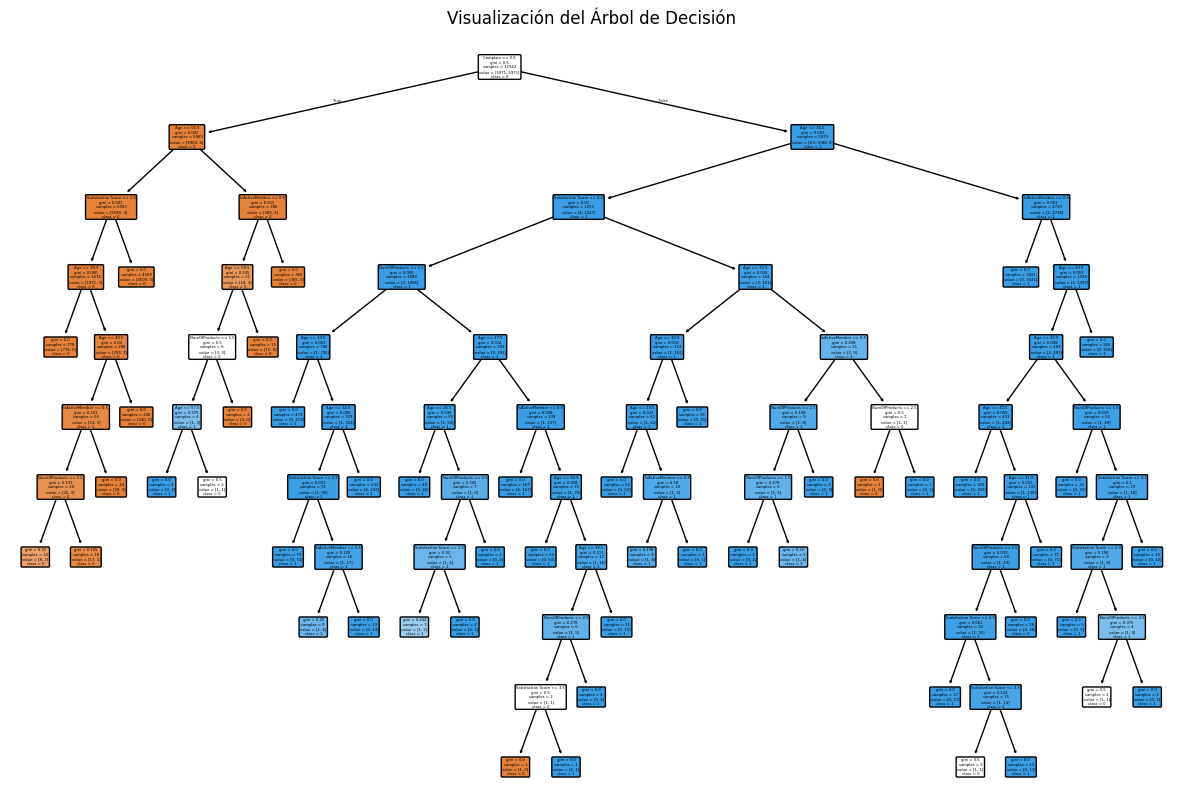

In [58]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(dt_model, feature_names=x.columns, class_names=["0", "1"], filled=True, rounded=True)
plt.title("Visualización del Árbol de Decisión")
plt.show()

In [59]:
dt_model_pruned = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model_pruned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [55]:
DecisionTreeClassifier(max_depth=5, random_state=42)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [60]:
y_pred_pruned = dt_model_pruned.predict(X_test)
y_pred_train_pruned = dt_model_pruned.predict(X_train)

print("Reporte de Clasificación - Árbol de Decisión (Train):")
print(classification_report(y_train, y_pred_train_pruned))

Reporte de Clasificación - Árbol de Decisión (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5971
           1       1.00      1.00      1.00      5971

    accuracy                           1.00     11942
   macro avg       1.00      1.00      1.00     11942
weighted avg       1.00      1.00      1.00     11942



In [61]:
# Print the classification report
print(classification_report(y_test, y_pred_pruned))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred_pruned))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1991
           1       1.00      1.00      1.00       509

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500

[[1989    2]
 [   2  507]]


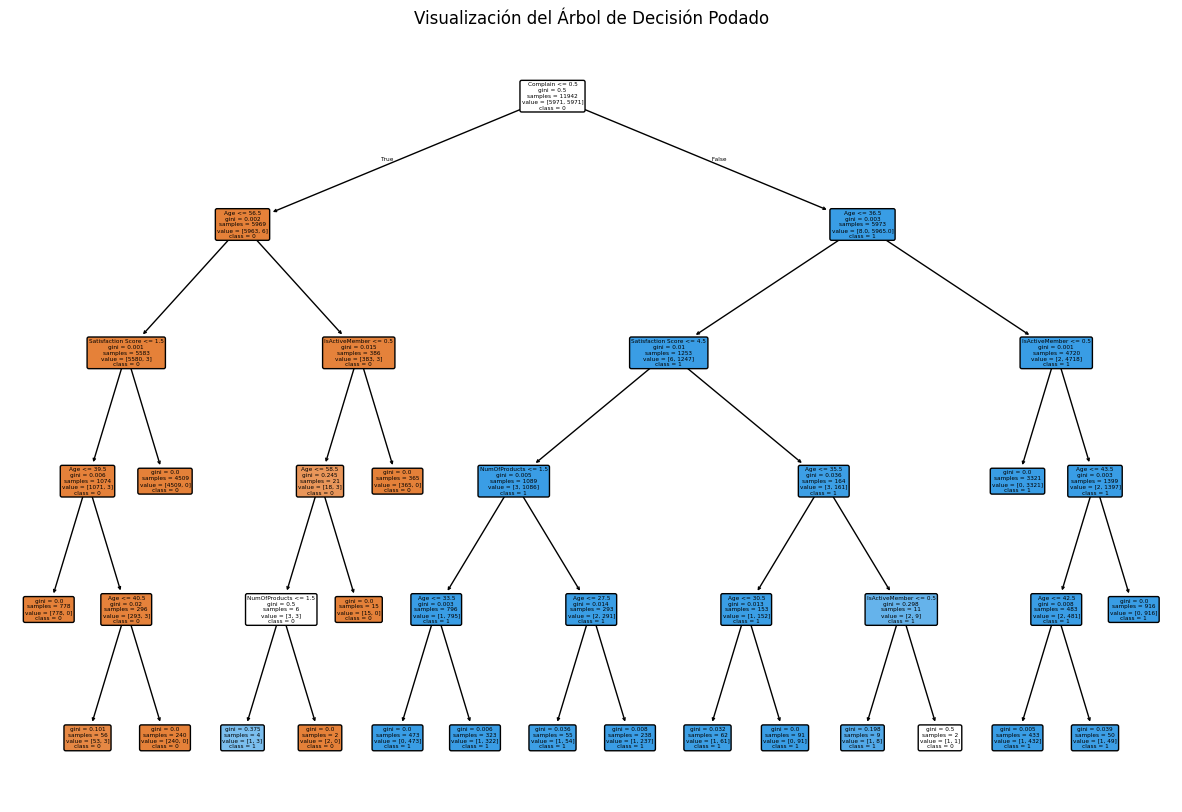

In [62]:
plt.figure(figsize=(15, 10))
plot_tree(dt_model_pruned, feature_names=x.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.title("Visualización del Árbol de Decisión Podado")
plt.show()

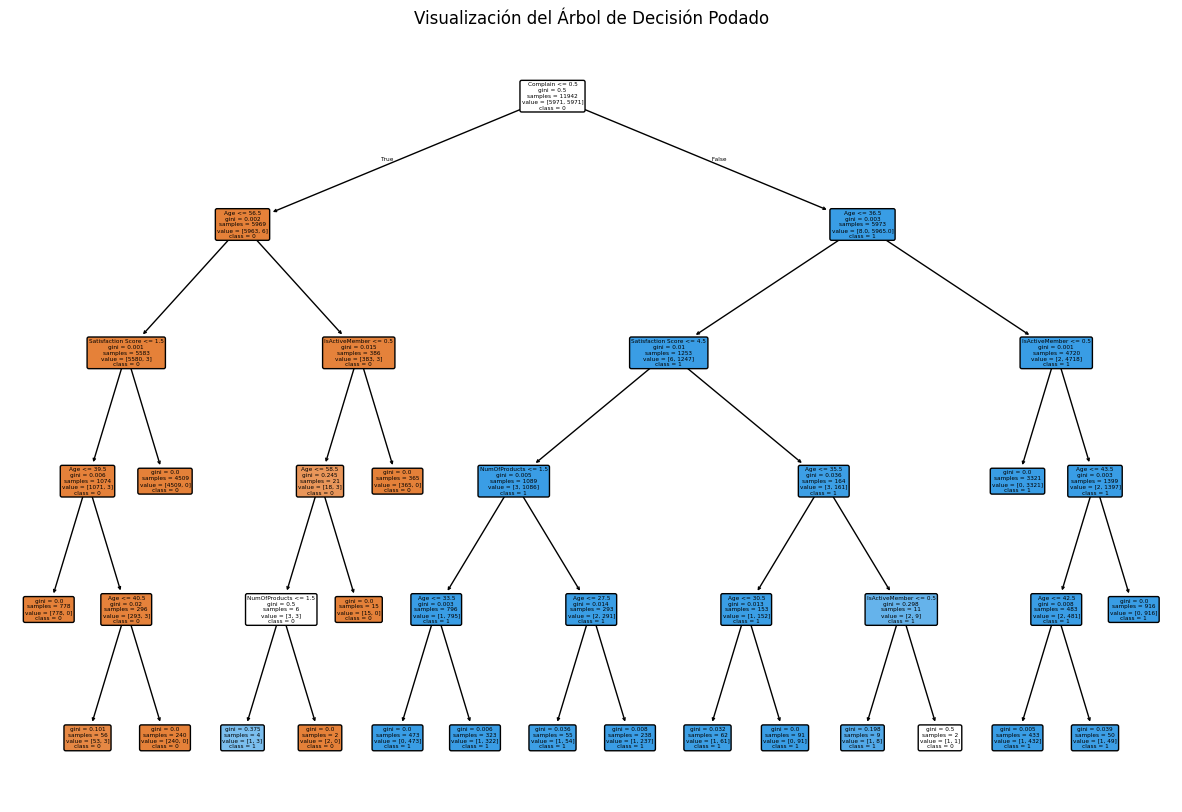

In [63]:
plt.figure(figsize=(15, 10))
plot_tree(dt_model_pruned, feature_names=x.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.title("Visualización del Árbol de Decisión Podado")
plt.show()

# Overfiting

**Pregunta Teórica**

¿Que es el overfitting y como puedes detectarlo en un modelo de Machine Learning? Explica que medidas tomarıas para evitar el sobreajuste y mejorar la capacidad de generalizacion de tu modelo.

**Respuesta:**

El sobrejuste ocurre cuando un modelo de Machine Learning aprende demasiado bien los datos de entrenamiento, incluyendo el ruido y las particularidades, lo que provoca que tenga un excelente rendimiento en esos datos pero un desempeño pobre en datos nuevos o no vistos. En otras palabras, el modelo no generaliza bien y pierde capacidad predictiva fuera del conjunto de entrenamiento.

Para detectarlo, se puede comparar el rendimiento del modelo en el conjunto de entrenamiento y prueba, y si la precisión en entrenamiento es alta pero baja en prueba, es una clara señal de overfitting. También es útil observar las curvas de aprendizaje o aplicar validación cruzada. Algunas medidas para evitar el overfitting incluyen validación cruzada, regularización, poda en árboles de decisión, reducir la complejidad del modelo, aumentar el tamaño del dataset, etc.

**Preguntas Prácticas**

Despues de entrenar los modelos, evalua su desempeno usando metricas adicionales como precision, recall, F1 y la matriz de confusion. Responde las siguientes preguntas:

- ¿Que modelo tiene el mejor desempeño general? Justifica tu respuesta utilizando las metricas.

El modelo de regresión logística tuvo un rendimiento general superior al del árbol de decisión, al presentar métricas más balanceadas, en particular en el F1-score y el ROC AUC. Esto sugiere que tiene una mayor capacidad para diferenciar entre clases sin caer en el sobreajuste.

- ¿Como impacta el desbalanceo de clases en la metrica ROC AUC y en otras metricas?

El desequilibrio entre clases impacta negativamente en métricas como la precisión (accuracy), que puede parecer alta si el modelo se limita a predecir la clase más común. Además, disminuye la utilidad de métricas como el recall y el F1-score en la clase menos representada. Aunque el ROC AUC es más resistente a este problema, también puede verse afectado si el modelo no distingue correctamente entre ambas clases.

- ¿Que acciones tomarıas si el modelo tiene un alto sesgo hacia la clase mayoritaria?
Cuando el modelo muestra un fuerte sesgo hacia la clase mayoritaria, es recomendable emplear técnicas como SMOTE o el ajuste de pesos por clase, utilizar métricas más adecuadas como el F1-score, revisar la selección de variables y aplicar validación cruzada estratificada para garantizar un aprendizaje equilibrado de ambas clases.

# Reflexión Crítica


- ¿Qu´e desaf´ıos enfrentaste al trabajar con los datos proporcionados?

Uno de los principales desafíos al trabajar con los datos fue el preprocesamiento; especialmente la conversión adecuada de variables categóricas como Geography y Gender, incluyendo la conversión de variables categóricas a formato numérico, el manejo del desbalance de clases y la aplicación de técnicas de escalado para evitar sesgos en modelos sensibles a las magnitudes, como la regresión logística.

- ¿Qu´e mejorar´ıas en el proceso de preprocesamiento de datos?
 Mejoraría la limpieza de los datos y la selección de variables. Por ejemplo, podría eliminar columnas que no aportan al modelo y normalizar los datos numéricos para que todos tengan el mismo rango.

- Si pudieras recolectar m´as datos, ¿qu´e variables adicionales ser´ıan ´utiles para mejorar el modelo
de clasificaci´on?
Si pudiera recolectar más datos, incluiría variables que aporten mayor contexto al comportamiento del cliente, como historial de interacción con el servicio (reclamos, consultas), nivel de satisfacción, uso de productos o servicios adicionales, ingresos estimados, historial crediticio y duración de la relación con la empresa.

- ¿C´omo asegurar´ıas que el modelo generalice bien y no est´e sobreajustado?
Para asegurar que el modelo generalice bien y no esté sobreajustado, aplicaría validación cruzada, preferiblemente estratificada si hay desbalance de clases, para evaluar su desempeño en distintos subconjuntos de los datos. También controlaría la complejidad del modelo mediante regularización, poda (en árboles), o ajustando hiperparámetros

- ¿Qu´e impacto tuvo el desbalanceo de clases en la precisi´on de tu modelo? ¿C´omo se resolvi´o con SMOTE?
El desbalanceo de clases hizo que la precisión del modelo fuera engañosamente alta, ya que este tendía a predecir mayoritariamente la clase más frecuente, descuidando la minoritaria. Esto afectó especialmente métricas como el recall y el F1-score para la clase minoritaria. Al aplicar SMOTE, se generaron ejemplos sintéticos de la clase menos representada, lo que ayudó a equilibrar el conjunto de datos y permitió al modelo aprender mejor las características de ambas clases, mejorando así su capacidad de clasificación y reduciendo el sesgo.

- ¿C´omo detectar´ıas y manejar´ıas el overfitting en un modelo de Machine Learning? ¿Qu´e t´ecnicas implementar´ıas para mejorar la capacidad de generalizaci´on?
Para detectar el overfitting en un modelo de Machine Learning, compararía el rendimiento en el conjunto de entrenamiento con el rendimiento en el conjunto de validación o prueba. Si el modelo muestra una alta precisión en el entrenamiento pero un bajo desempeño en la validación, es probable que esté sobreajustado.

Para manejar el overfitting, implementaría las siguientes técnicas para mejorar la capacidad de generalización:

- Aplicaría técnicas como L1 (Lasso) o L2 (Ridge) para penalizar los coeficientes grandes y evitar que el modelo se ajuste demasiado a los datos de entrenamiento.

- Limitaría la profundidad de los árboles o establecería un mínimo de muestras por hoja para evitar que los árboles se ajusten demasiado a los datos ruidosos.

- Utilizaría validación cruzada estratificada para evaluar el rendimiento del modelo en distintos subconjuntos de los datos y asegurarme de que se generalice bien.
